<font face="黑体" size=3><center>姓名：徐子杰</center>
<font face="黑体" size=3><center>学号：2016302010098</center>
<font face="黑体" size=3><center>专业：数理金融</center>

### 1.

根据欧拉方程与消费约束
$$\begin{aligned}\frac{c_{t+1}}{c_t} &= \beta [\alpha  k_{t+1}^{\alpha-1} + (1-\delta)]\end{aligned}$$
$$\begin{aligned}c_t+k_{t+1} -(1-\delta)k_t &= k_t^{\alpha}\end{aligned}$$

与已有数据计算出下列数据:

In [5]:
delta, alpha, beta = 0.05, 0.3, 0.95
k_ss = ((1/beta-1+delta)/alpha)**(1/(alpha-1))
k_0 = k_ss/2
k_max = (1/delta)**(1/(1-alpha))
k_G = (alpha/delta)**(1/(1-alpha))

并定义一个$\begin{aligned}\dot{k}=0\end{aligned}$的函数css:

In [6]:
def css(k):
    return k**alpha-delta*k
c_ss = css(k_ss)
c_max = css(k_G)

在已有$k_{ss}$与$c_{ss}$的情况下通过将$k_t^{\alpha}$进行泰勒展开得到$k_t^{\alpha}=k_{ss}^{\alpha}+\alpha*k_{ss}^{\alpha-1}*(k_t-k_ss)$,得到公式
$$
\begin{aligned}
c_t=\frac{c_{t+1}}{\beta*((1-\delta)+\alpha*k_{t+1}^{\alpha-1})}\\
k_t=\frac{c_t+k_{t+1}+(\alpha-1)*k_{ss}^{\alpha}}{\alpha*k_{ss}^{\alpha-1}+(1-\delta)}
\end{aligned}
$$

因此可以定义一个进行backward shooting的函数:

In [8]:
import numpy as np
def backward(n=200):
    c = np.zeros((n, 1))
    k = np.zeros((n, 1))
    c[n-1] = c_ss
    k[n-1] = k_ss-0.001     # 让c_t+1与c_t的比值略大于1
    for i in range(n-1, 0, -1):
        c[i-1] = c[i]/(beta*((1-delta)+alpha*k[i]**(alpha-1)))
        k[i-1] = (c[i-1]+k[i]+(alpha-1)*k_ss**alpha)/(alpha*k_ss**(alpha-1)+(1-delta))
        if k[i-1] <= k_0:   
            c = c[i-1:]
            k = k[i-1:]     # 选取非零的有效期数
            break
    return k, c

In [11]:
k_back, c_back = backward()

这样就得到了收敛于均衡点的序列，通过定义一个画图函数来作图：

In [15]:
import matplotlib.pyplot as plt
def plot_func(k, c, title):
    fig, ax = plt.subplots()
    plt.xlim((0, k_max))
    plt.ylim((0, 1.5*c_max))
    k_simulation = np.linspace(0, k_max, 500)
    ax.plot(k_simulation, css(k_simulation), label ='$\dotk=0$', linestyle = '-.')
    plt.axvline(x = k_ss, ymin = 0, ymax = 1.5*c_max, label = '$\dotc=0$', linestyle = '-')
    plt.axvline(x = k_0, ymin = 0 ,ymax = 1.5*c_max, label = '$k_0$', linestyle = ':')
    ax.plot(k, c, label = "stable saddle path", linewidth = 2, linestyle = '--')
    ax.legend(loc = "upper right")
    ax.set_title(title, fontsize = 20, fontweight = 'heavy')
    plt.show()

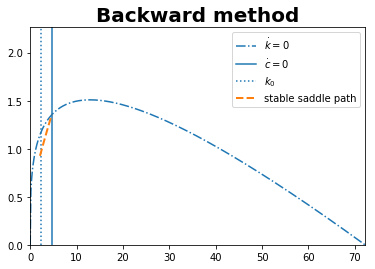

In [16]:
plot_func(k_back, c_back, 'Backward method')

c_back的长度为75期，即通过了75期从初始状态收敛到稳定状态。

求出数据$\frac{k_t}{y_t}$与$\ln(\frac{k_t}{y_t})-1$

In [23]:
sr = k_back/c_back
lsr = np.log(sr)-1

In [30]:
lsr.reshape(1, 75)

array([[-0.17475736, -0.09967009, -0.04331616,  0.00045957,  0.03532862,
         0.06363646,  0.08696127,  0.10640909,  0.12278092,  0.13667275,
         0.14853816,  0.15872902,  0.16752282,  0.1751415 ,  0.18176478,
         0.18753975,  0.19258796,  0.19701069,  0.20089294,  0.20430652,
         0.20731246,  0.20996286,  0.21230244,  0.21436973,  0.21619804,
         0.21781624,  0.21924947,  0.22051965,  0.22164594,  0.2226451 ,
         0.22353186,  0.22431917,  0.22501839,  0.22563958,  0.22619158,
         0.22668221,  0.22711838,  0.2275062 ,  0.22785109,  0.22815783,
         0.22843068,  0.2286734 ,  0.22888933,  0.22908144,  0.22925236,
         0.22940443,  0.22953971,  0.22966005,  0.22976708,  0.22986226,
         0.22994687,  0.23002206,  0.23008882,  0.23014807,  0.23020059,
         0.23024707,  0.23028813,  0.23032431,  0.23035606,  0.2303838 ,
         0.23040787,  0.23042855,  0.23044608,  0.23046064,  0.23047237,
         0.23048136,  0.23048763,  0.23049117,  0.2

注意到lsr在后期几乎稳定在0.23左右，即该增长率在稳定状态是一个定值，拥有稳定增长的特性。

### 2.

欧拉方程与消费约束为
$$\begin{aligned}\frac{c_{t+1}-\bar{c}}{c_t-\bar{c}} &= \beta [\alpha  k_{t+1}^{\alpha-1} + (1-\delta)]\end{aligned}$$
$$\begin{aligned}c_t+k_{t+1} -(1-\delta)k_t &= k_t^{\alpha}\end{aligned}$$

利用forward shooting解决该问题的思路为给定$k_0$并通过改变$c_0$的值并通过公式:

$$\begin{aligned}k_{t+1}=(1-\delta)*k_t+k_t^{\alpha}-c_t\end{aligned}$$
$$\begin{aligned}c_{t+1}=\beta*(c_t-\bar{c})*((1-\delta)+\alpha*k_{t+1}^{\alpha-1})+\bar{c}\end{aligned}$$

来获得增长路径，并判断这些增长路径是否趋近于一个稳态。

定义一个forward shotting的函数:

In [33]:
def forward(n=200):
    c_bar = 1
    for c_0 in np.linspace(c_bar, c_max, 10000):
        c = np.zeros((n, 1))
        k = np.zeros((n, 1))
        c[0] = c_0
        k[0] = k_0
        try:
            for i in range(n-1):
                k[i+1] = k[i]**alpha+(1-delta)*k[i]-c[i]
                c[i+1] = (c[i]-c_bar)*beta*((1-delta)+alpha*k[i+1]**(alpha-1))+c_bar
                if k[i+1] <= 0:
                    raise Exception
            if abs(k[-1]-k_ss) <= 0.01 and abs(c[-1]-c_ss) <= 0.01:
                return k, c
        except:
            pass
    return k, c

In [38]:
k_forw, c_forw = forward()

D:\anaconda\envs\virtualenvironment\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in power
  # This is added back by InteractiveShellApp.init_path()


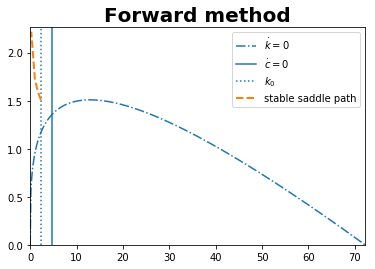

In [40]:
plot_func(k_forw, c_forw, 'Forward method')

并没有找到收敛路径...摸索了很长时间也并没有找到问题出在什么地方，实在是没办法了...

附上python代码的整合：

In [ ]:
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt


delta, alpha, beta = 0.05, 0.3, 0.95
k_ss = ((1/beta-1+delta)/alpha)**(1/(alpha-1))
k_0 = k_ss/2
k_max = (1/delta)**(1/(1-alpha))
k_G = (alpha/delta)**(1/(1-alpha))

def css(k):
    return k**alpha-delta*k
c_ss = css(k_ss)
c_max = css(k_G)

class Solution:
    @staticmethod
    def backward(n=200):
        c = np.zeros((n, 1))
        k = np.zeros((n, 1))
        c[n-1] = c_ss
        k[n-1] = k_ss-0.001     # 让C_t+1与C_t的比值略大于1
        for i in range(n-1, 0, -1):
            c[i-1] = c[i]/(beta*((1-delta)+alpha*k[i]**(alpha-1)))
            k[i-1] = (c[i-1]+k[i]+(alpha-1)*k_ss**alpha)/(alpha*k_ss**(alpha-1)+(1-delta))
            if k[i-1] <= k_0:
                c = c[i-1:]
                k = k[i-1:]     # 选取非零的有效期数
                break
        return k, c


    @staticmethod
    def forward(n=200):
        c_bar = 1
        for c_0 in np.linspace(c_bar, c_max, 10000):
            c = np.zeros((n, 1))
            k = np.zeros((n, 1))
            c[0] = c_0
            k[0] = k_0
            try:
                for i in range(n-1):
                    k[i+1] = k[i]**alpha+(1-delta)*k[i]-c[i]
                    c[i+1] = (c[i]-c_bar)*beta*((1-delta)+alpha*k[i+1]**(alpha-1))+c_bar
                    if k[i+1] <= 0:
                        raise Exception
                if abs(k[-1]-k_ss) <= 0.01 and abs(c[-1]-c_ss) <= 0.01:
                    return k, c
            except:
                pass
        return k, c


    @staticmethod
    def plot(k, c, title):
        fig, ax = plt.subplots()
        plt.xlim((0, k_max))
        plt.ylim((0, 1.5*c_max))
        k_simulation = np.linspace(0, k_max, 500)
        ax.plot(k_simulation, css(k_simulation), label ='$\dotk=0$', linestyle = '-.')
        plt.axvline(x = k_ss, ymin = 0, ymax = 1.5*c_max, label = '$\dotc=0$', linestyle = '-')
        plt.axvline(x = k_0, ymin = 0 ,ymax = 1.5*c_max, label = '$k_0$', linestyle = ':')
        ax.plot(k, c, label = "stable saddle path", linewidth = 2, linestyle = '--')
        ax.legend(loc = "upper right")
        ax.set_title(title, fontsize = 20, fontweight = 'heavy')
        plt.show()

if __name__ == '__main__':
    s = Solution
    k_back, c_back = s.backward()
    s.plot(k_back, c_back, 'Backward method')
    k_forward, c_forward = s.forward()
    s.plot(k_forward, c_forward, 'Forward method')
